# Building Simple linear Regression using ANN with Tensorflow

In [52]:
#Name: Mwanje Musa
#Reg No: MAY22/MSC/1615U
#Programme: MSc. COMP (CS)

In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

In [54]:
df = pd.read_csv("FuelConsumptionCo2.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [55]:
train_x = np.asanyarray(df[['ENGINESIZE']])
train_y = np.asanyarray(df[['CO2EMISSIONS']])

In [56]:
#First, we initialize the variables a and b, with any random guess, and then we define the linear function
a = tf.Variable(20.0)
b = tf.Variable(30.2)


def h(x):
   y = a*x + b
   return y

In [57]:
#To find value of our loss, we use tf.reduce_mean(). 
#This function finds the mean of a multidimensional tensor, and the result can have a different dimension.
def loss_object(y,train_y) :
    return tf.reduce_mean(tf.square(y - train_y))
    # Below is a predefined method offered by TensorFlow to calculate loss function
    #loss_object = tf.keras.losses.MeanSquaredLogarithmicError()

In [58]:
#Now we are ready to start training and run the graph. We use GradientTape to calculate gradients
learning_rate = 0.01
train_data = []
loss_values =[]
a_values = []
b_values = []
# steps of looping through all your data to update the parameters
training_epochs = 200

# train model
for epoch in range(training_epochs):
    with tf.GradientTape() as tape:
        y_predicted = h(train_x)
        loss_value = loss_object(train_y,y_predicted)
        loss_values.append(loss_value)

        # get gradients
        gradients = tape.gradient(loss_value, [b,a])
        
        # compute and adjust weights
        a_values.append(a.numpy())
        b_values.append(b.numpy())
        b.assign_sub(gradients[0]*learning_rate)
        a.assign_sub(gradients[1]*learning_rate)
        if epoch % 5 == 0:
            train_data.append([a.numpy(), b.numpy()])

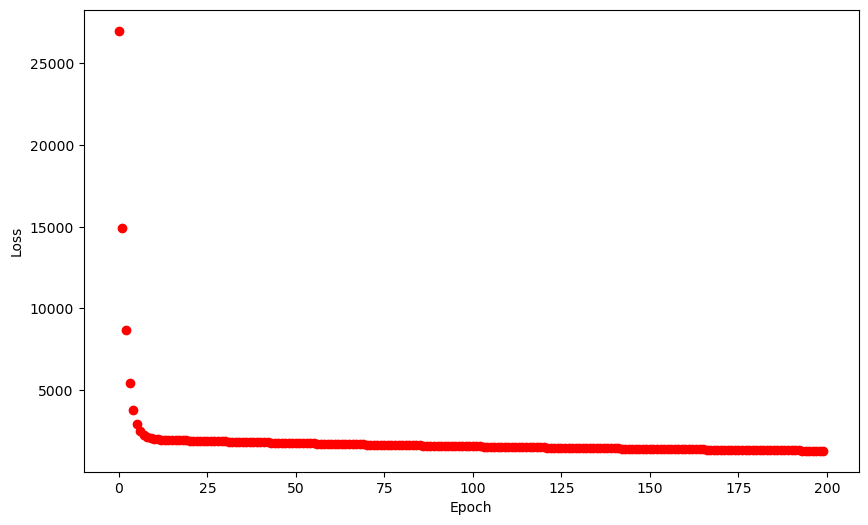

In [59]:
#Lets plot the loss values to see how it has changed during the training:
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(loss_values, 'ro')

Lets visualize how the coefficient and intercept of line has changed to fit the data:

The green dots are the data points, the red lines are created using the a and b coefficients during training, and the black line is the line we use to model the relationship with the final/last coefficients.

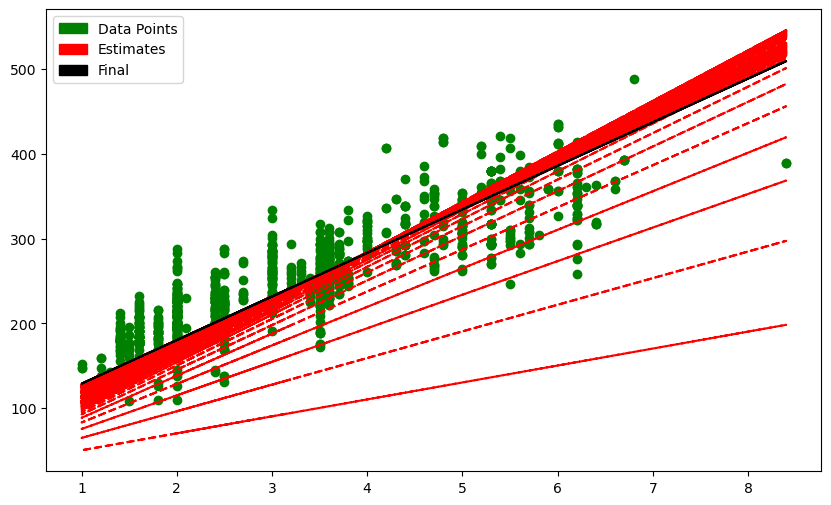

In [60]:
plt.scatter(train_x, train_y, color='green')
for a,b in zip(a_values[0:len(a_values)], b_values[0:len(b_values)]):
    plt.plot(train_x,a*train_x+b, color='red', linestyle='dashed')
plt.plot(train_x,a_values[-1]*train_x+b_values[-1], color='black')

final = mpatches.Patch(color='Black', label='Final')
estimates = mpatches.Patch(color='Red', label='Estimates')
data = mpatches.Patch(color='Green', label='Data Points')

plt.legend(handles=[data, estimates, final])

plt.show()

# Assignment : ACTIVITY

a.) Write codes that can produce the best line of simple linear Regression

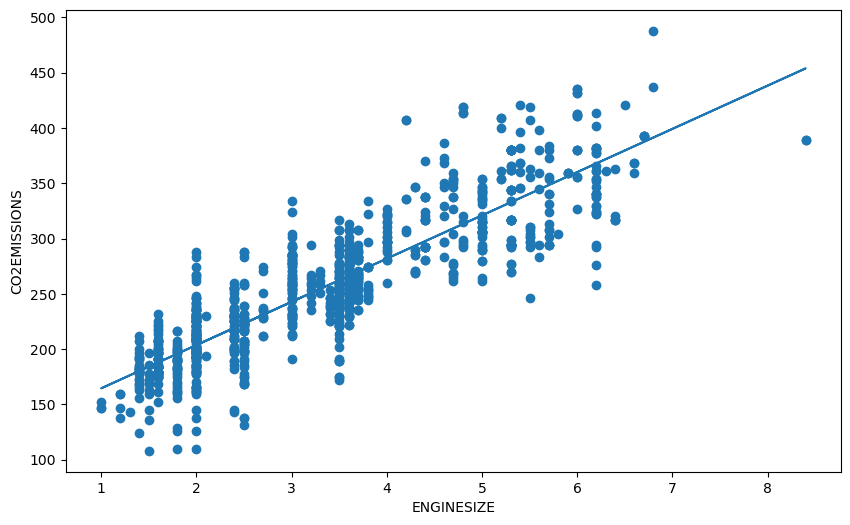

In [61]:
from sklearn.linear_model import LinearRegression

x = df[['ENGINESIZE']].values.reshape(-1,1)
y = df[['CO2EMISSIONS']]

# Define the variable lr_model as our linear regression model
lr_model = LinearRegression()
lr_model.fit(x, y)

# Find predicted values for all x values by applying ŷᵢ = θ₀ + θ₁𝑥ᵢ
y_pred = lr_model.predict(x)

plt.scatter(x, y)
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
# Here we are plotting our regression line ŷ = θ₀ + θ₁𝑥
plt.plot(x, y_pred)

b.) determine the coefficient and intercept value

In [62]:
print("Coefficient: ", lr_model.coef_)
print ("Intercept: ", lr_model.intercept_)

Coefficient:  [[39.12519979]]
Intercept:  [125.3040995]


c.) Evaluate the model by obtaining the value of MSE and R-squared value

In [63]:
mean_values = df.mean(numeric_only=True)
print('The mean values of every variable are:\n', mean_values)

The mean values of every variable are:
 MODELYEAR                   2014.000000
ENGINESIZE                     3.346298
CYLINDERS                      5.794752
FUELCONSUMPTION_CITY          13.296532
FUELCONSUMPTION_HWY            9.474602
FUELCONSUMPTION_COMB          11.580881
FUELCONSUMPTION_COMB_MPG      26.441425
CO2EMISSIONS                 256.228679
dtype: float64


In [64]:
print('R-squared: %.2f' % lr_model.score(x, y))

R-squared: 0.76
